## Linear Regression

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form

$$
\large y = \large  \alpha x + \large  \beta + e
$$

where:
<br>$\alpha$ is commonly known as the *slope*
<br>$\beta$ is commonly known as the *intercept*. 
<br>$e$ is referred to as the noise

$x$ represents the feature which in our case is Years Experience. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Code Dictionary
code | description
-----|------------
`test_train_split(Input_data, Output_data, percentage_of_test)` | Using the Scikit learn library, Split arrays or matrices into random train and test subsets
`.LinearRegression()` | Linear regression model
`.fit()` | computes the results of the scikit learn model object like LinearRegression.  Effectively, it solves for $y = \alpha x + \beta + e$
`.summary()` | returns the summary from the computed results from `.fit()`
`.predict()` | Computes the result of new input data without output for a fitted model.
`plt.plot()` | Plot a line graph of data.
`.plt.scatter()` | Plot a scatterplot of data.

We Load our data in pandas as a dataframe first

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset['YearsExperience']
y = dataset['Salary']

We then create a random split of our data set with one third as test data set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

### Scikit-Learn's Estimator API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#### 4. Fit the model to the data

Here we apply our model to data.
This can be done with the ``fit()`` method of the model:

In [6]:
regressor.fit(X=X_train.values.reshape(-1, 1), y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [11]:
regressor.coef_

array([9345.94244312])

In [8]:
regressor.intercept_

26816.19224403119

#### 5. Predict labels for unknown data
​
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [9]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [10]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

Text(0, 0.5, 'Salary')

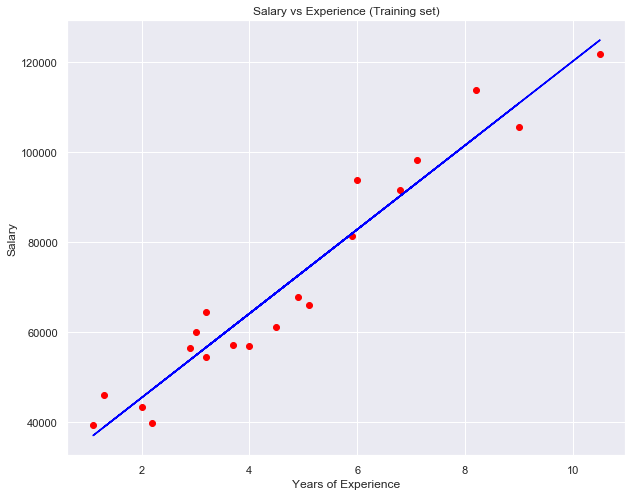

In [14]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

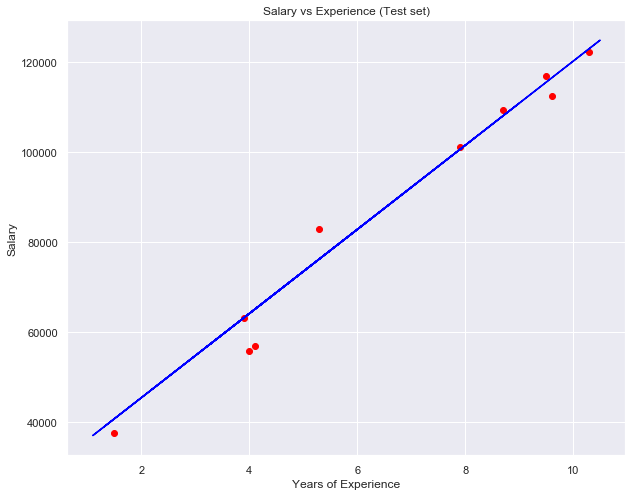

In [9]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')